<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#工具包导入&amp;数据读取" data-toc-modified-id="工具包导入&amp;数据读取-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>工具包导入&amp;数据读取</a></span><ul class="toc-item"><li><span><a href="#工具包导入" data-toc-modified-id="工具包导入-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>工具包导入</a></span></li><li><span><a href="#数据读取" data-toc-modified-id="数据读取-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据读取</a></span></li></ul></li><li><span><a href="#回顾-&amp;-思考-&amp;-Magic" data-toc-modified-id="回顾-&amp;-思考-&amp;-Magic-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>回顾 &amp; 思考 &amp; Magic</a></span><ul class="toc-item"><li><span><a href="#回顾&amp;思考" data-toc-modified-id="回顾&amp;思考-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>回顾&amp;思考</a></span></li><li><span><a href="#Magic---Fake-Data" data-toc-modified-id="Magic---Fake-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Magic - Fake Data</a></span><ul class="toc-item"><li><span><a href="#变量分布观察" data-toc-modified-id="变量分布观察-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>变量分布观察</a></span></li><li><span><a href="#变量unique分布观察" data-toc-modified-id="变量unique分布观察-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>变量unique分布观察</a></span></li><li><span><a href="#Magic猜想" data-toc-modified-id="Magic猜想-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><font color="red"><strong>Magic猜想</strong></font></a></span><ul class="toc-item"><li><span><a href="#训练集测试" data-toc-modified-id="训练集测试-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>训练集测试</a></span></li><li><span><a href="#测试集测试" data-toc-modified-id="测试集测试-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>测试集测试</a></span></li><li><span><a href="#重新观察" data-toc-modified-id="重新观察-2.2.3.3"><span class="toc-item-num">2.2.3.3&nbsp;&nbsp;</span>重新观察</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#加入Magic的模型" data-toc-modified-id="加入Magic的模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>加入Magic的模型</a></span><ul class="toc-item"><li><span><a href="#模型训练框架" data-toc-modified-id="模型训练框架-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>模型训练框架</a></span></li><li><span><a href="#模型训练-&amp;-测试" data-toc-modified-id="模型训练-&amp;-测试-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>模型训练 &amp; 测试</a></span><ul class="toc-item"><li><span><a href="#模型训练" data-toc-modified-id="模型训练-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="#结果提交" data-toc-modified-id="结果提交-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>结果提交</a></span></li><li><span><a href="#实验结果（PB：0.90693，-LB：0.90997,-275/9038）" data-toc-modified-id="实验结果（PB：0.90693，-LB：0.90997,-275/9038）-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>实验结果（<font color="red">PB：0.90693， LB：0.90997, 275/9038</font>）</a></span></li></ul></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 工具包导入&数据读取
## 工具包导入

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn import metrics
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from tqdm import tqdm_notebook as tqdm

## 数据读取 

In [2]:
path = '/data/Data_JieZhang/santander-customer-transaction-prediction/'
train = pd.read_csv(path + 'train.csv')
test  = pd.read_csv(path + 'test.csv')

# 回顾 & 思考 & Magic
## 回顾&思考

在上一篇notebook中,我们发现一个奇怪的现象,加入无脑的frequency编码之后,我们的线下和线上都得到了提升,但是线下的提升明显要远高于线上,这种情况我认为很正常,就像微软或者其他类似的比赛一样,线下线上分布差得比较大的时候就会经常出现这种情况, 而且我个人认为只要保证线下和线上一致基本就没什么问题了,但是后来我看评论圈,大家都说线下和线上基本是同步的,也就是说,线下如果0.91,那么线上应该很大概率也是0.91,可是事实并不是这样,那究竟是什么导致了这样的情况呢？
 

## Magic - Fake Data

- 本次比赛的最大Magic来源于该文章:List of Fake Samples and Public/Private LB split,链接：https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split

下面我们还原一下作者当时的思考过程,作者说虽然每个特征分布训练集和测试集看不出太大的区别,但是训练集和测试集的unique分布却是极其不一致的, 一般很少会出现这样的,那么是不是这个样子呢?

我们分别随机抽两个变量进行观察一下,




### 变量分布观察

此处我们随机选取var_0和var_1进行观察,我们发现数据在分布上几乎是一样的,差别不大。

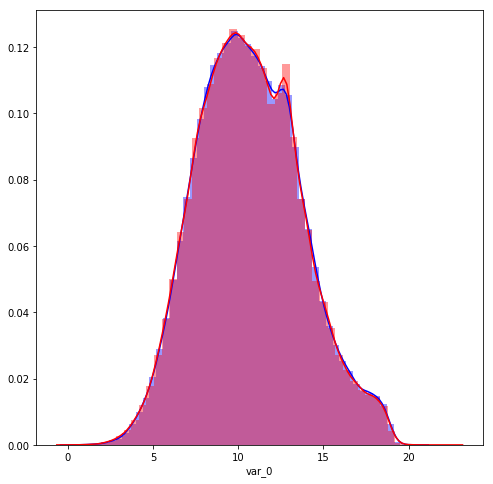

In [24]:
plt.figure(figsize=[8,8]) 
ax1 = sns.distplot(train['var_0'], color='blue')
ax1 = sns.distplot(test['var_0'], color='red') 

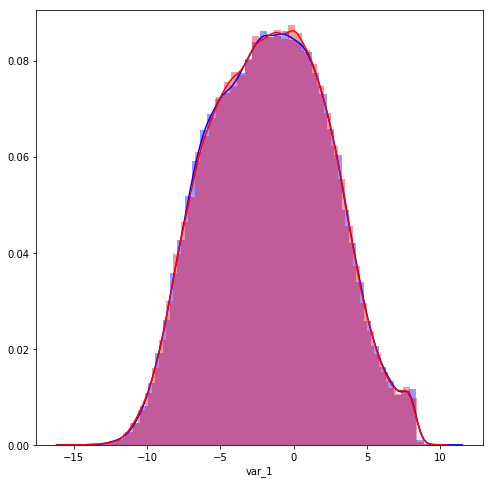

In [23]:
plt.figure(figsize=[8,8]) 
ax1 = sns.distplot(train['var_1'], color='blue')
ax1 = sns.distplot(test['var_1'], color='red') 

### 变量unique分布观察

我们发现训练集和测试集的unique分布是极其不一样的,测试集的unique分布是训练集的两倍。究竟是什么导致的这样的问题呢？


In [6]:
cols = [col for col in train.columns if col not in['ID_code','target']]
train_nunique = train[cols].nunique()
test_nunique  = test[cols].nunique() 

In [28]:
train_nunique.head()

var_0     94672
var_1    108932
var_2     86555
var_3     74597
var_4     63515
dtype: int64

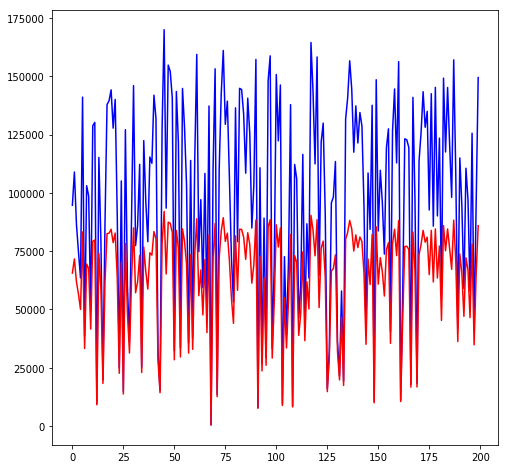

In [27]:
plt.figure(figsize=[8,8]) 
plt.plot(train_nunique.values, color='blue')
plt.plot(test_nunique.values, color='red')

### <font color=red>**Magic猜想**</font>
> 1.测试集是由真的测试集和假的测试集所构成,假的测试集是防止用户进行LB Probe,真的测试集是用来评分的;<br />
> 2.真的测试集是应该在某一个特征上是唯一的,而假的则全部不唯一.



#### 训练集测试
- 我们发现在此猜想下所有的数据都是真的

In [31]:
train_path = path + 'train.csv'

df_train = pd.read_csv(train_path)
df_train.drop(['ID_code'], axis=1, inplace=True)
df_train.drop(['target'], axis=1, inplace=True)
df_train = df_train.values

unique_samples = []
unique_count = np.zeros_like(df_train)
for feature in tqdm(range(df_train.shape[1])):
    _, index_, count_ = np.unique(df_train[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes      = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

HBox(children=(IntProgress(value=0, max=200), HTML(value='')))


200000
0


#### 测试集测试
- 我们发现测试集刚刚好被划分为两部分,一部分是真的数据,另外一部分是假的数据

In [32]:
test_path = path + 'test.csv'

df_test = pd.read_csv(test_path)
df_test.drop(['ID_code'], axis=1, inplace=True)
df_test = df_test.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in tqdm(range(df_test.shape[1])):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

HBox(children=(IntProgress(value=0, max=200), HTML(value='')))


100000
100000


#### 重新观察

- <font color=red>我们发现删除了假样本之后,我们训练集和测试集的unique的分布基本一致了.</font>

In [42]:
cols = [col for col in train.columns if col not in['ID_code','target']]
train_nunique = train[cols].nunique()
test_nunique  = test.loc[real_samples_indexes][cols].nunique() 

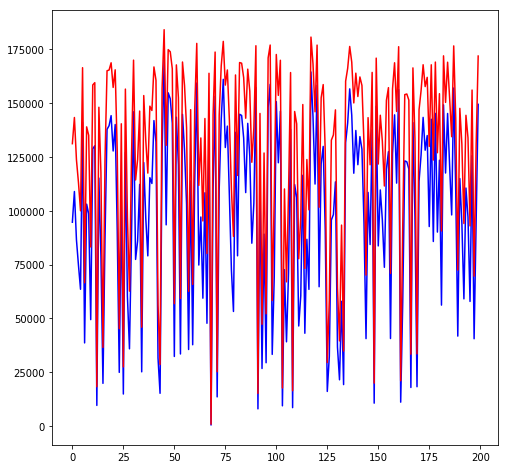

In [43]:
plt.figure(figsize=[8,8]) 
plt.plot(train_nunique.values, color='blue')
plt.plot(test_nunique.values * 2, color='red')

# 加入Magic的模型
## 模型训练框架

In [45]:
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
def validation_prediction_lgb(X,y,feature_names, ratio =1, X_test = None,istest = False):
    n_fold = 5
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    params = {
        'num_leaves': 10,
        'max_bin': 127,
        'min_data_in_leaf': 11,
        'learning_rate': 0.02,
        'min_sum_hessian_in_leaf': 0.00245,
        'bagging_fraction': 1, 
        'bagging_freq': 5, 
        'feature_fraction': 0.5,
        'lambda_l1': 4.972,
        'lambda_l2': 2.276,
        'min_gain_to_split': 0.65,
        'max_depth': 32,
        'save_binary': False,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 0,
        'metric': 'auc',
        'is_unbalance': False,
        'boost_from_average': False,
    } 

    importances = pd.DataFrame() 
    
    if istest:
        prediction = np.zeros(len(X_test))
    models = []
    
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X,y)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        weights = [ratio  if val == 1 else 1 for val in y_train]
        
        train_data = lgb.Dataset(X_train, label=y_train,  weight=weights)
        valid_data = lgb.Dataset(X_valid, label=y_valid)

        model = lgb.train(params,train_data,num_boost_round=20000,
                        valid_sets = [train_data, valid_data],verbose_eval=200,early_stopping_rounds = 200)
        
        imp_df = pd.DataFrame() 
        imp_df['feature']  = feature_names
        imp_df['split']    = model.feature_importance()
        imp_df['gain']     = model.feature_importance(importance_type='gain')
        imp_df['fold']     = fold_n + 1
        
        importances = pd.concat([importances, imp_df], axis=0)
        
        models.append(model)
        if istest == True:
            prediction += model.predict(X_test, num_iteration=model.best_iteration)/5
    if istest == True:     
        return models,importances, prediction
    else:
        return models,importances

## 模型训练 & 测试
- 和上一节一样,此处我们加入frequency编码,因为删除了fake数据,此处我们的frequency编码会更加精确.

In [46]:
tr_te = pd.concat([train,test.loc[real_samples_indexes]],axis=0, ignore_index=True)

In [48]:
for col in train.columns:
    if 'var' in col:
        tr_te[col + '_cnt'] = tr_te[col].map(tr_te[col].value_counts())

### 模型训练

In [49]:
train_cols = [col for col in tr_te.columns if col not in ['target','ID_code']]
print(len(train_cols))
models,importances,prediction = validation_prediction_lgb(tr_te.iloc[:train.shape[0]][train_cols].values, tr_te.iloc[:train.shape[0]]['target'].values, train_cols, X_test= tr_te.iloc[train.shape[0]:][train_cols].values, istest=True)

400
Fold 0 started at Sat Apr 13 10:17:54 2019
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.820133	valid_1's auc: 0.805341
[400]	training's auc: 0.868099	valid_1's auc: 0.848306
[600]	training's auc: 0.8896	valid_1's auc: 0.866009
[800]	training's auc: 0.902305	valid_1's auc: 0.876191
[1000]	training's auc: 0.9114	valid_1's auc: 0.883145
[1200]	training's auc: 0.918067	valid_1's auc: 0.888001
[1400]	training's auc: 0.923137	valid_1's auc: 0.891674
[1600]	training's auc: 0.9273	valid_1's auc: 0.89454
[1800]	training's auc: 0.930779	valid_1's auc: 0.896776
[2000]	training's auc: 0.93375	valid_1's auc: 0.898731
[2200]	training's auc: 0.936205	valid_1's auc: 0.900352
[2400]	training's auc: 0.938442	valid_1's auc: 0.901769
[2600]	training's auc: 0.940383	valid_1's auc: 0.902838
[2800]	training's auc: 0.942221	valid_1's auc: 0.903854
[3000]	training's auc: 0.943873	valid_1's auc: 0.904613
[3200]	training's auc: 0.945426	valid_1's auc: 0.905403
[3400]

[8400]	training's auc: 0.974527	valid_1's auc: 0.907696
Early stopping, best iteration is:
[8258]	training's auc: 0.973976	valid_1's auc: 0.907754
Fold 4 started at Sat Apr 13 10:26:49 2019
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.822877	valid_1's auc: 0.803691
[400]	training's auc: 0.87024	valid_1's auc: 0.843107
[600]	training's auc: 0.89104	valid_1's auc: 0.859822
[800]	training's auc: 0.903587	valid_1's auc: 0.869646
[1000]	training's auc: 0.912208	valid_1's auc: 0.87714
[1200]	training's auc: 0.918757	valid_1's auc: 0.882471
[1400]	training's auc: 0.923853	valid_1's auc: 0.886733
[1600]	training's auc: 0.927946	valid_1's auc: 0.889935
[1800]	training's auc: 0.931408	valid_1's auc: 0.892456
[2000]	training's auc: 0.934207	valid_1's auc: 0.894318
[2200]	training's auc: 0.93676	valid_1's auc: 0.896013
[2400]	training's auc: 0.938954	valid_1's auc: 0.897365
[2600]	training's auc: 0.940958	valid_1's auc: 0.898614
[2800]	training's auc: 0.94

In [51]:
np.mean([0.908464, 0.908797, 0.913648, 0.907754, 0.904431])

0.9086188

### 结果提交

In [50]:
train_cols = [col for col in tr_te.columns if col not in ['target','ID_code']]
print(len(train_cols))

pred_prob_ = 0
for model in models:
    pred_prob_ += model.predict(tr_te.iloc[train.shape[0]:,:][train_cols].values) * 1.0 / len(models)

sub1 = pd.DataFrame()
sub1['ID_code'] = tr_te.iloc[train.shape[0]:,:]['ID_code'].values
sub1['target']  = pred_prob_

sub             = pd.DataFrame()
sub['ID_code']  = test['ID_code'].values
sub             = sub.merge(sub1, on='ID_code', how='left')
sub['target']   = sub['target'].fillna(0)
sub.to_csv('baseline_frequency_nofake.csv',index = None)

400


### 实验结果（<font color=red>PB：0.90693， LB：0.90997, 275/9038</font>）
- PB：0.90693,LB：0.90997, 线上排名:275/9038

![](./pic/baseline_frequency_nofake.png)

从线下CV的结果和线上提交的结果来看,线上线下终于是一致的。


 # 小结

在这一章，我们：

- 对上一节出现的线上和线下分布不一致情况进行了分析,发现训练集和测试集的特征分布是一致的,但是训练集和测试集的unique分布是差别非常大的;
- 我们假设测试集是由真的测试集和fake的测试集数据构成,并假设fake数据的生成方案,基于这种假设我们删除了fake数据,并得到了unique数据的正常分布;
- 最后我们删除fake数据进行特征的构建,最终线上和线下达到了一致的情况;最终的结果也达到了银牌.

剩下的还有一些神奇的操作,大家可以阅读discussion区的精彩讨论并自己尝试实践.